# MIND HACKATHON
# 20BCE276,20BCE290,20BCE319,20BCE321


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('../Desktop/data.csv')

In [26]:
data.head()

,Date,value
0,"January 1, 2020",71.165
1,"January 2, 2020",71.348
2,"January 3, 2020",71.754
3,"January 4, 2020",71.761
4,"January 5, 2020",71.761


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    894 non-null    object 
 1   value   894 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [28]:
data['Date'] = pd.to_datetime(data['Date'])


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    894 non-null    datetime64[ns]
 1   value   894 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.1 KB


In [30]:
df=data

In [31]:
df  = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

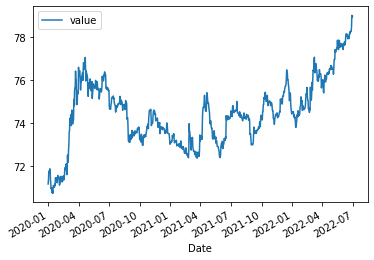

In [35]:
df.plot()

In [33]:
df.head()

,value
Date,
2020-01-01,71.165
2020-01-02,71.348
2020-01-03,71.754
2020-01-04,71.761
2020-01-05,71.761


In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
m = adfuller(df['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)     

test statistics             -1.433012
p-value                      0.566351
lags used                    1.000000
no of observations used    892.000000
critical value(1%)          -3.437702
critical value(5%)          -2.864786
critical value(10%)         -2.568498
dtype: float64


In [40]:
log = np.log(df)

In [41]:
logmean = log.rolling(window = 12).mean()
logstd = log.rolling(window = 12).std()

In [42]:
logmeanscale = log - logmean

In [43]:
logmeanscale = logmeanscale.dropna()

In [44]:
m = adfuller(logmeanscale['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics           -8.707570e+00
p-value                    3.664847e-14
lags used                  0.000000e+00
no of observations used    8.820000e+02
critical value(1%)        -3.437786e+00
critical value(5%)        -2.864822e+00
critical value(10%)       -2.568518e+00
dtype: float64


In [45]:
exp = log.ewm(halflife = 12,min_periods = 0,adjust = True).mean()

In [46]:
logexp = log - exp

In [47]:
m = adfuller(logexp['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics             -5.067126
p-value                      0.000016
lags used                    1.000000
no of observations used    892.000000
critical value(1%)          -3.437702
critical value(5%)          -2.864786
critical value(10%)         -2.568498
dtype: float64


In [48]:
logshift = log-log.shift()
logshift = logshift.dropna()

In [49]:
m = adfuller(logshift['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics            -32.427905
p-value                      0.000000
lags used                    0.000000
no of observations used    892.000000
critical value(1%)          -3.437702
critical value(5%)          -2.864786
critical value(10%)         -2.568498
dtype: float64


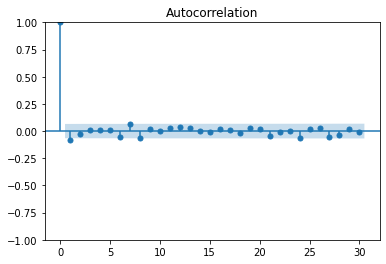

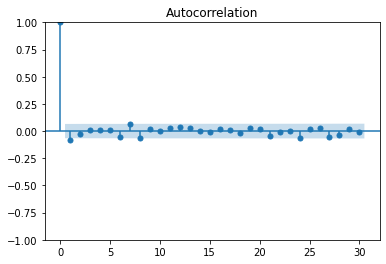

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import  statsmodels.api as sm
sm.graphics.tsa.plot_acf(logshift)

C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


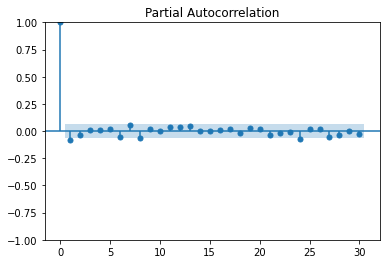

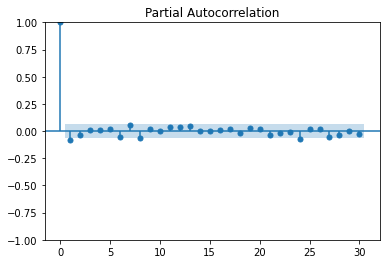

In [51]:
sm.graphics.tsa.plot_pacf(logshift)

In [52]:
model = sm.tsa.arima.ARIMA(logshift,order = (1,1,0))
result = model.fit()

C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
sum(result.fittedvalues-logshift['value'])**2

1.9263764424741455e-06

In [54]:
pred = result.predict(1,10)

<AxesSubplot:xlabel='Date'>

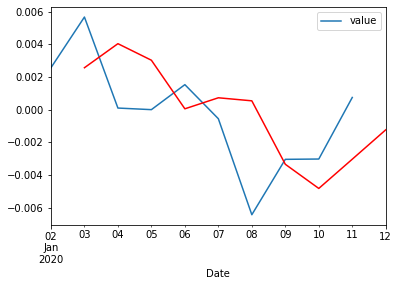

In [55]:
original = logshift.head(10)
original.plot()
pred.plot(color = 'red')

In [56]:
logshift.shape

(893, 1)

In [59]:
result.predict(890,895)

C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


890    0.001181
891    0.004653
892    0.003224
893   -0.000298
894    0.000118
895   -0.000100
Name: predicted_mean, dtype: float64

In [61]:
result.predict(896,905)

C:\Users\Tirth Shrimali\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


896    0.000014
897   -0.000046
898   -0.000014
899   -0.000031
900   -0.000022
901   -0.000027
902   -0.000024
903   -0.000026
904   -0.000025
905   -0.000025
Name: predicted_mean, dtype: float64